In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('D:\Development\Python Projects\Machine Learning\Microsoft\Customer_Churn_dataset.csv')
print(df.head(10))
print(df.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ESSAM\AppData\Local\Temp\ipykernel_174200\1704813890.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Development\Python Projects\Machine Learning\Microsoft\Customer_Churn_dataset.csv')


In [8]:
print(df.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
df.info()
print(df.describe().T)
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
for i in features :
  print(df[i].unique())
  print('\n')

['Female' 'Male']


[0 1]


['Yes' 'No']


['No' 'Yes']


[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


['No' 'Yes']


['No phone service' 'No' 'Yes']


['DSL' 'Fiber optic' 'No']


['No' 'Yes' 'No internet service']


['Yes' 'No' 'No internet service']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['No' 'Yes' 'No internet service']


['Month-to-month' 'One year' 'Two year']


['Yes' 'No']


['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


['No' 'Yes']




In [11]:
# for i in features :
#   df.loc[(df[i] == 'No') | (df[i] == 'no'), i] = '0'
#   df.loc[(df[i] == 'Yes') | (df[i] == 'yes') , i] = '1'
#   df.loc[(df[i] == 'No internet service'), i] = '2'
#   df.loc[(df[i] == 'No phone service'), i] = '2'
#   #=============== Gender ================================
#   df.loc[(df[i] == 'Male') | (df[i] == ',male') , i] = '1'
#   df.loc[(df[i] == 'Female') | (df[i] == ',female') , i] = '0'
#   #=============== Contract ================================
#   df.loc[(df[i] == 'Month-to-month'), i] = '0'
#   df.loc[(df[i] == 'One year'), i] = '1'
#   df.loc[(df[i] == 'Two year'), i] = '2'

columns = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
encoder = LabelEncoder()
for i in columns :
  df[i] = encoder.fit_transform(df[i])

print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [13]:
problem_cols = []
for col in features:
    try:
        pd.to_numeric(df[col])
    except ValueError:
        problem_cols.append(col)

print(problem_cols)
for col in problem_cols:
    non_numeric_values = df[col].apply(lambda x: not str(x).replace('.', '').isdigit() if pd.notna(x) else False)
    print("القيم غير الرقمية:")
    print(df[col][non_numeric_values].unique())

['TotalCharges']
القيم غير الرقمية:
[' ']


In [14]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = np.nan

In [15]:
df[features] = df[features].apply(pd.to_numeric, errors='ignore')
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


C:\Users\ESSAM\AppData\Local\Temp\ipykernel_174200\2154443256.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[features] = df[features].apply(pd.to_numeric, errors='ignore')


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
df['TotalCharges'].fillna(int(df['TotalCharges'].mean()), inplace=True)
df[features] = df[features].apply(pd.to_numeric, errors='ignore')
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


C:\Users\ESSAM\AppData\Local\Temp\ipykernel_174200\2350039164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(int(df['TotalCharges'].mean()), inplace=True)
C:\Users\ESSAM\AppData\Local\Temp\ipykernel_174200\2350039164.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[features] = df[features].apply(pd.to_numeric, errors='ignore')


In [17]:
# plt.boxplot(df[['MonthlyCharges']])

In [18]:
# plt.boxplot(df[['TotalCharges']])

In [19]:
# plt.boxplot(df[['Contract']])

In [20]:
# plt.boxplot(df[['PaymentMethod']])

In [21]:
# plt.boxplot(df[['MultipleLines']])

In [22]:
# plt.boxplot(df[['InternetService']])

In [23]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

def detect_and_handle_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

  print(f"Column: {column}")
  print(f"Number of outliers: {len(outliers)}")

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  print(f"Outliers handled for column: {column}\n")
  return df

for col in numerical_cols:
  df = detect_and_handle_outliers(df, col)

print(df.describe().T)


Column: gender
Number of outliers: 0
Outliers handled for column: gender

Column: SeniorCitizen
Number of outliers: 1142
Outliers handled for column: SeniorCitizen

Column: Partner
Number of outliers: 0
Outliers handled for column: Partner

Column: Dependents
Number of outliers: 0
Outliers handled for column: Dependents

Column: tenure
Number of outliers: 0
Outliers handled for column: tenure

Column: PhoneService
Number of outliers: 682
Outliers handled for column: PhoneService

Column: MultipleLines
Number of outliers: 0
Outliers handled for column: MultipleLines

Column: InternetService
Number of outliers: 0
Outliers handled for column: InternetService

Column: OnlineSecurity
Number of outliers: 0
Outliers handled for column: OnlineSecurity

Column: OnlineBackup
Number of outliers: 0
Outliers handled for column: OnlineBackup

Column: DeviceProtection
Number of outliers: 0
Outliers handled for column: DeviceProtection

Column: TechSupport
Number of outliers: 0
Outliers handled for co

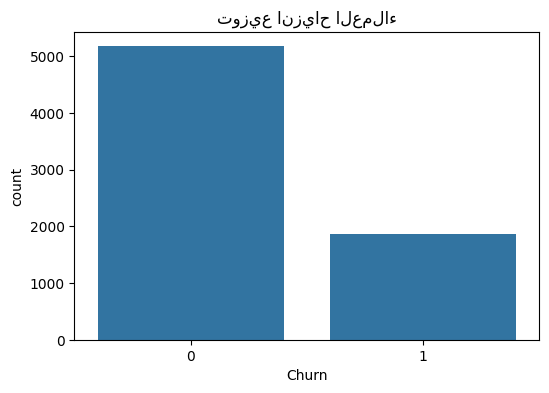

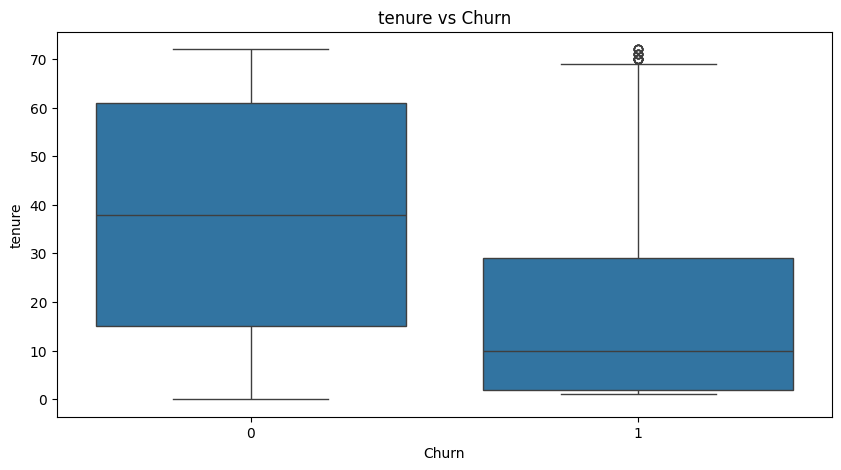

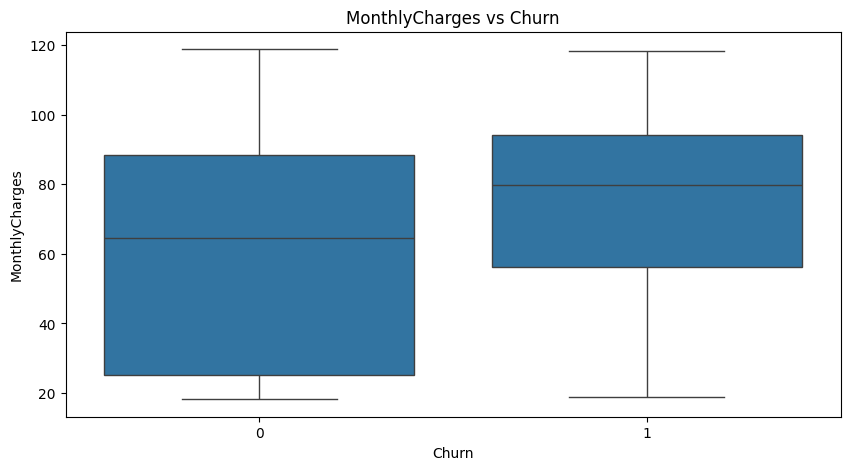

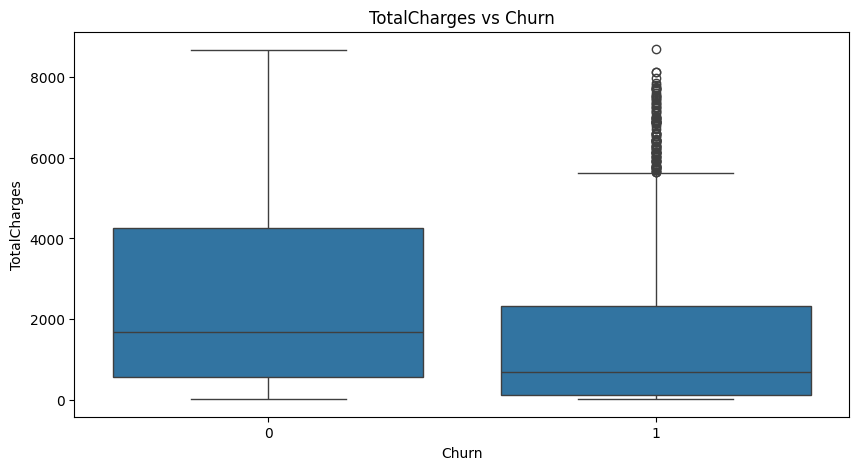

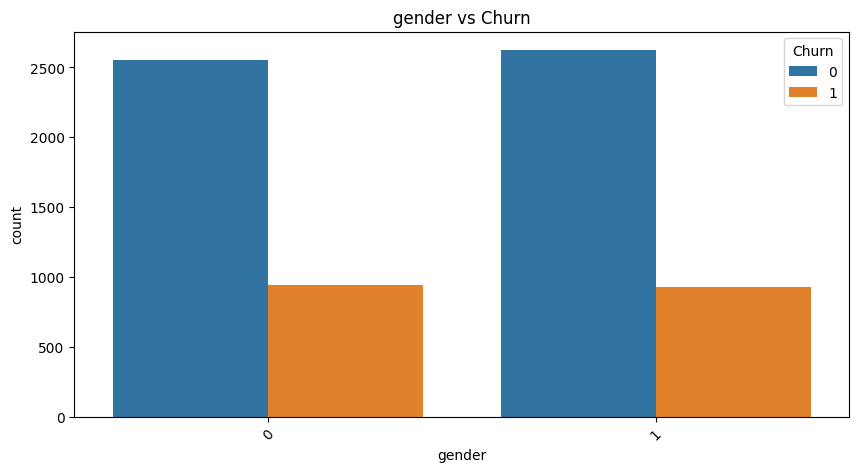

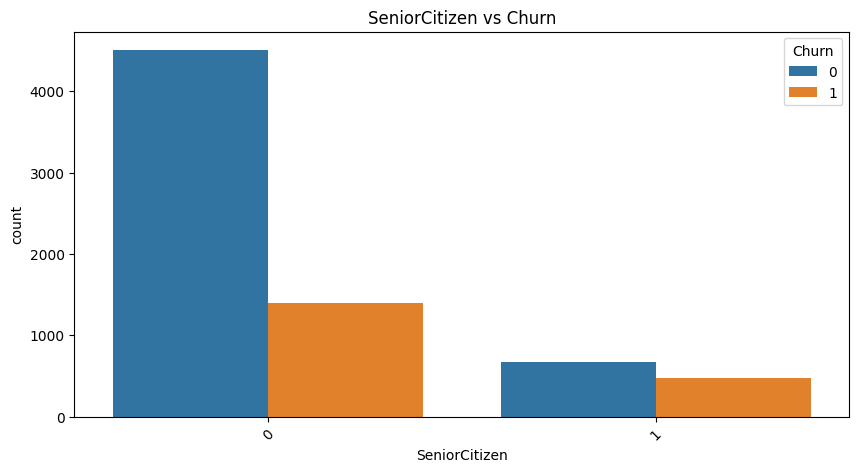

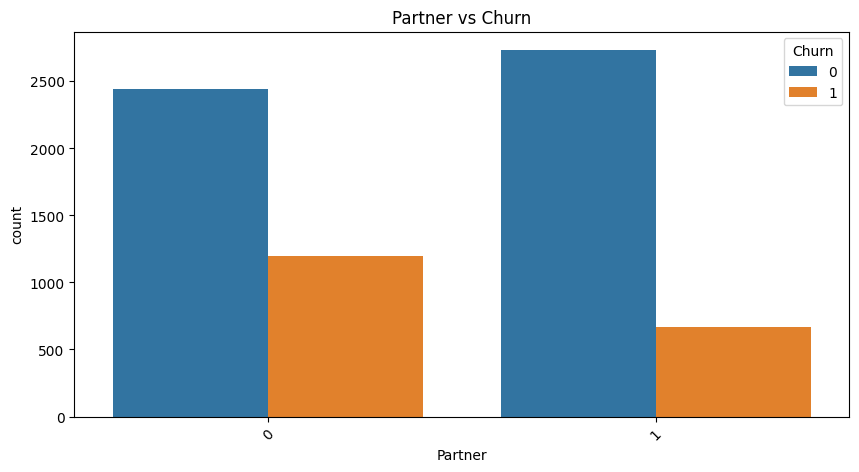

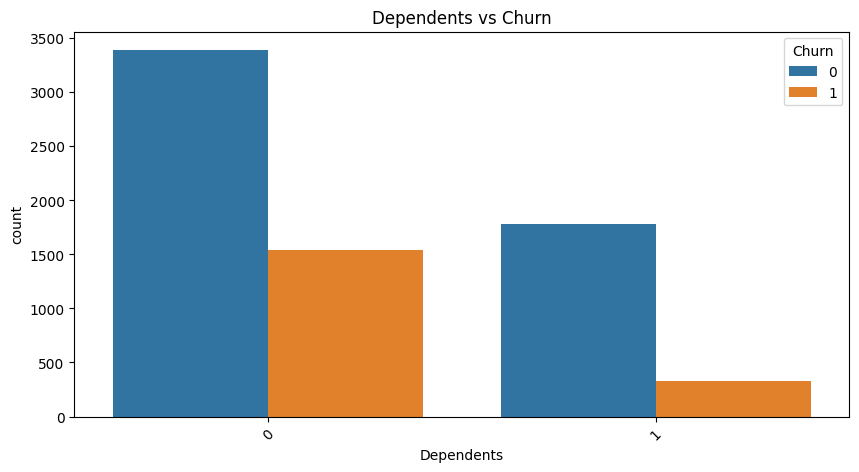

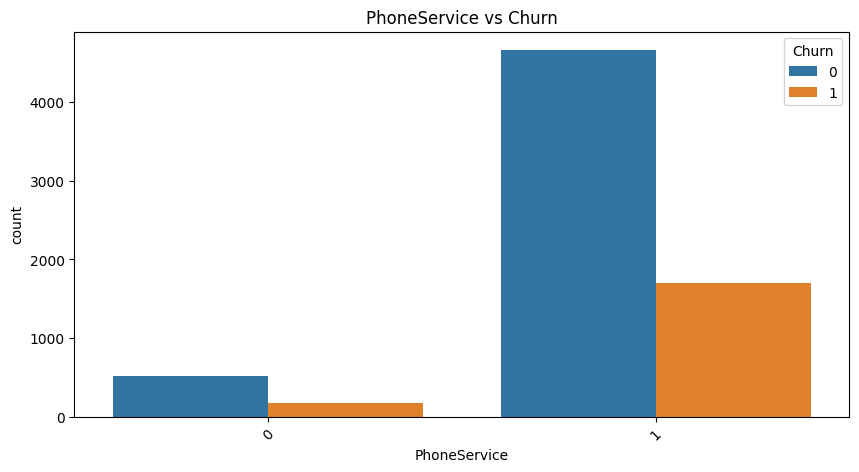

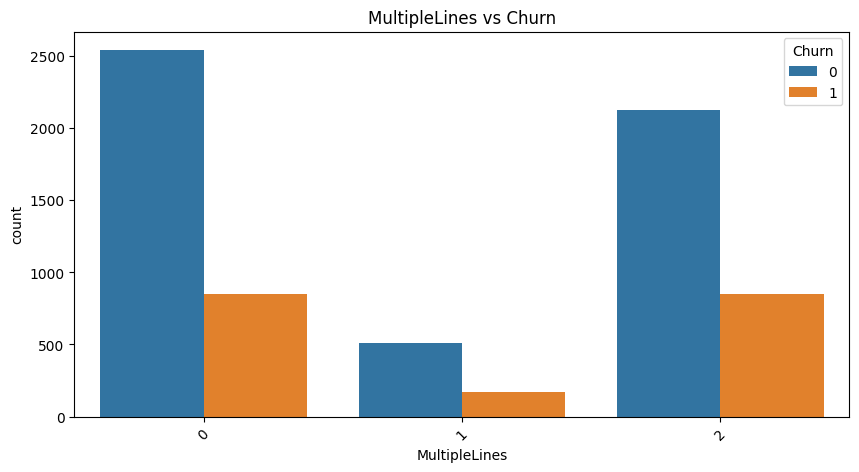

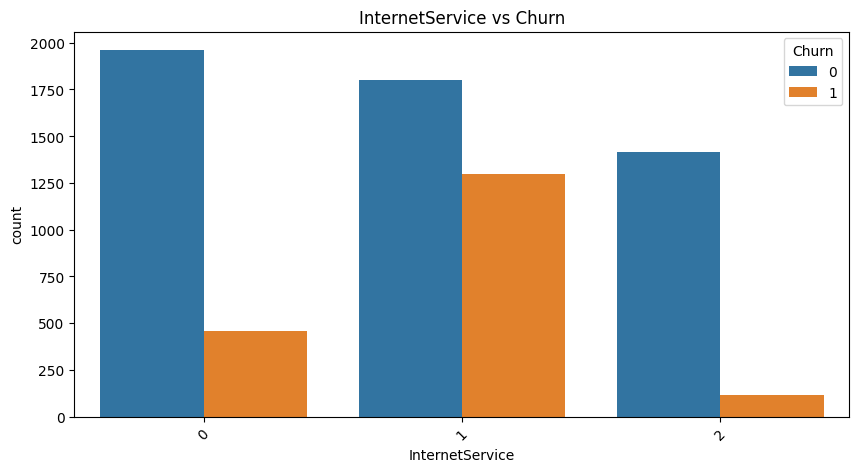

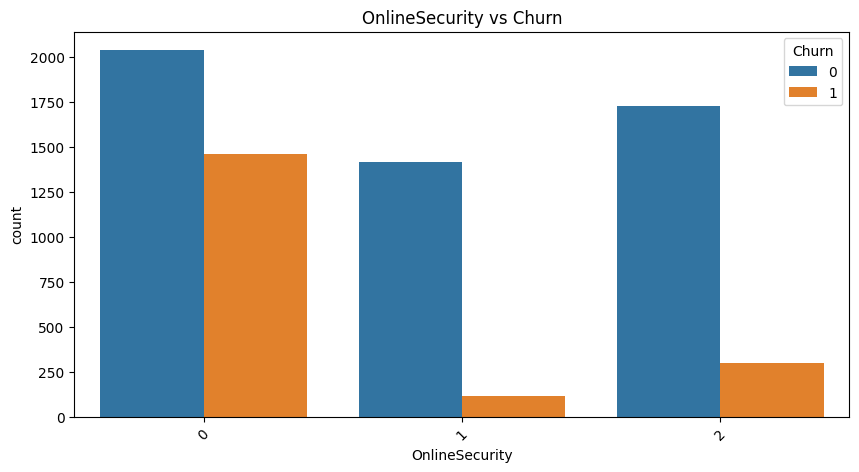

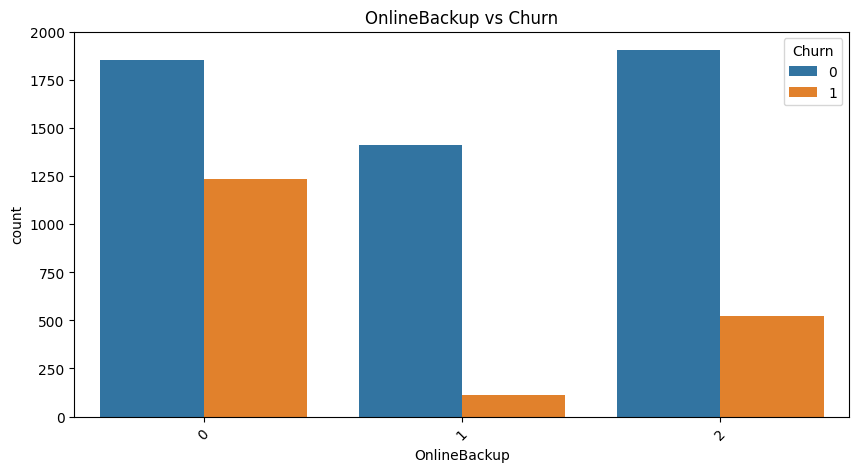

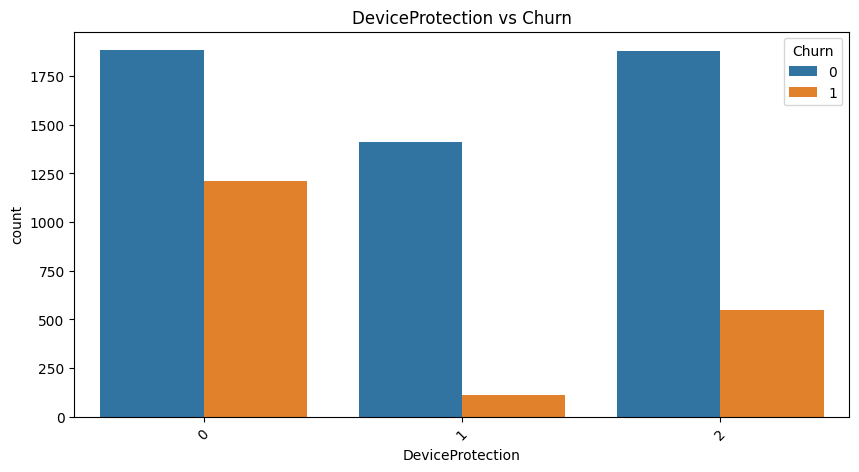

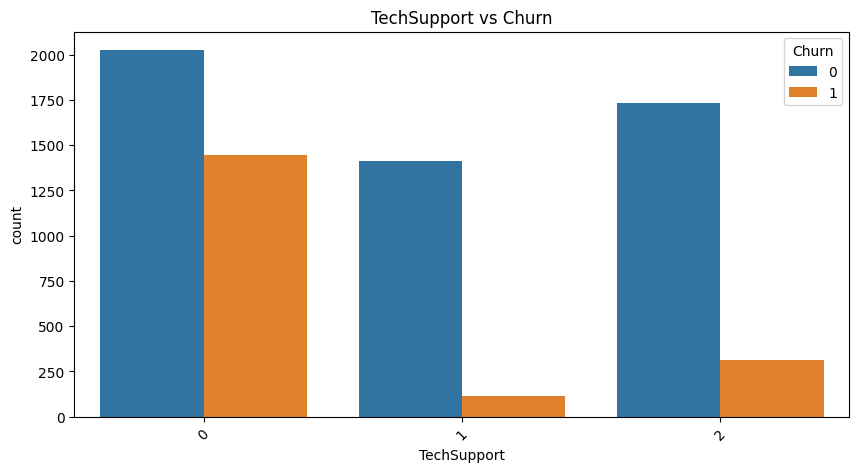

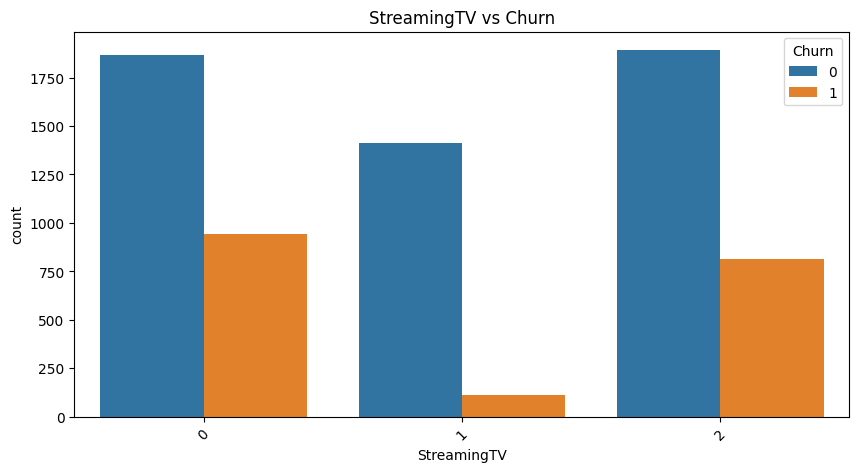

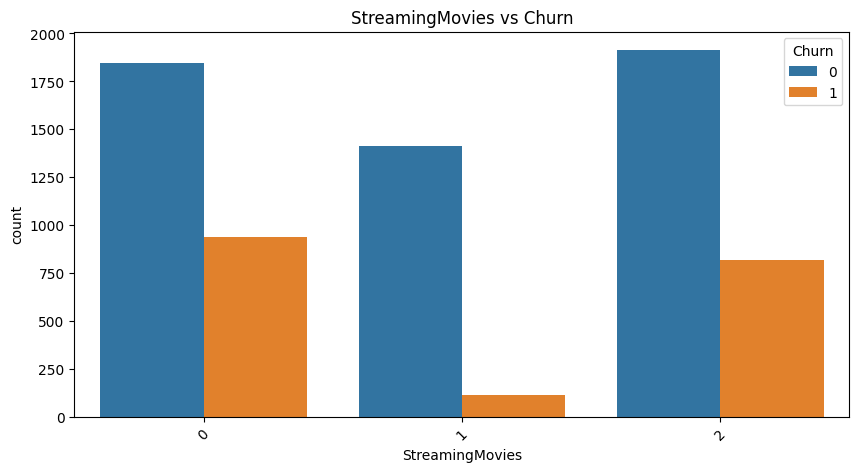

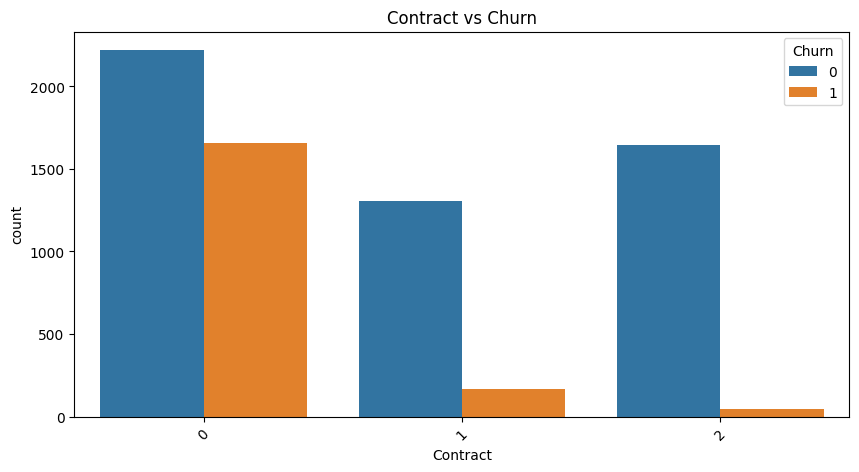

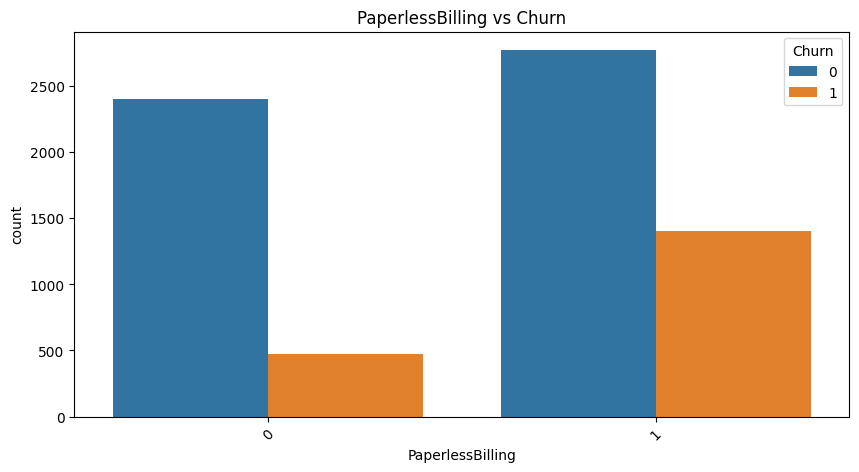

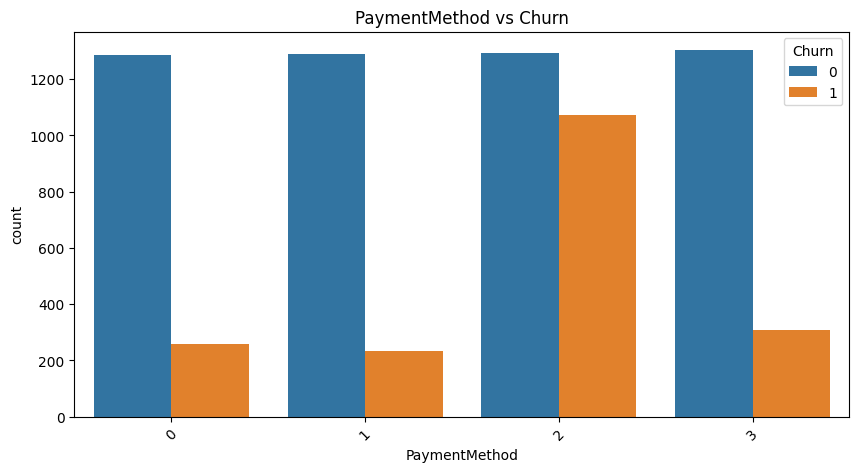

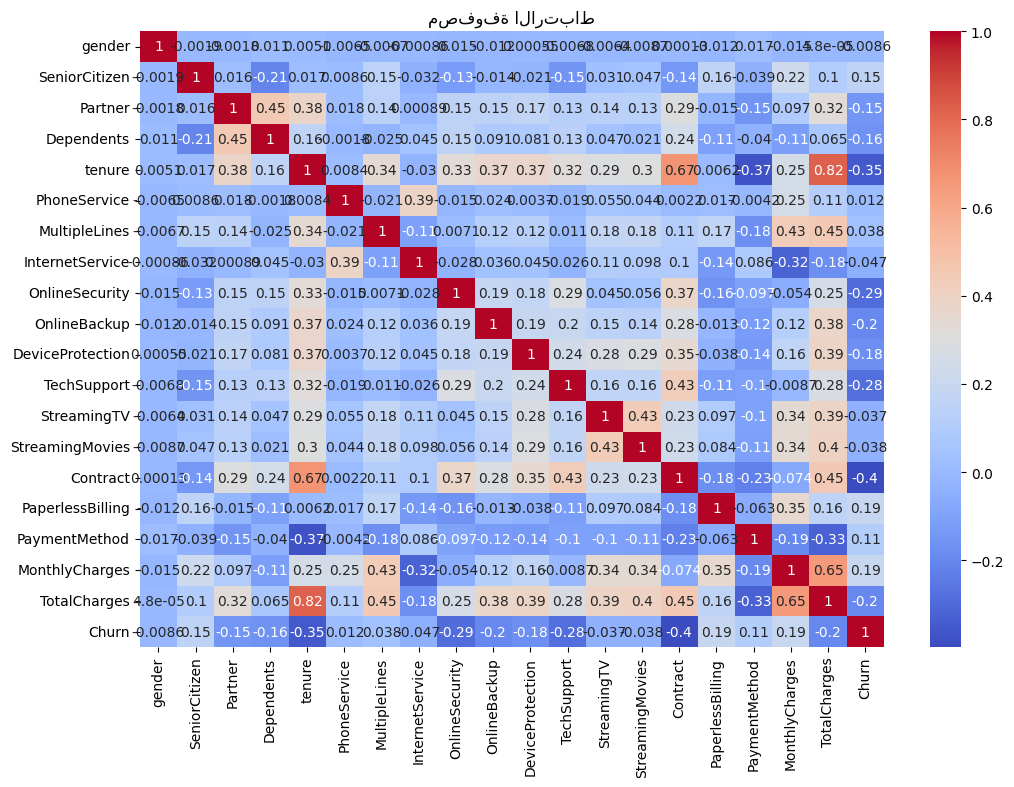

تقرير تصنيف الانحدار اللوجستي:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



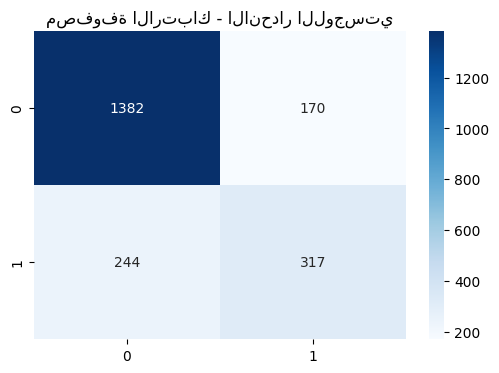

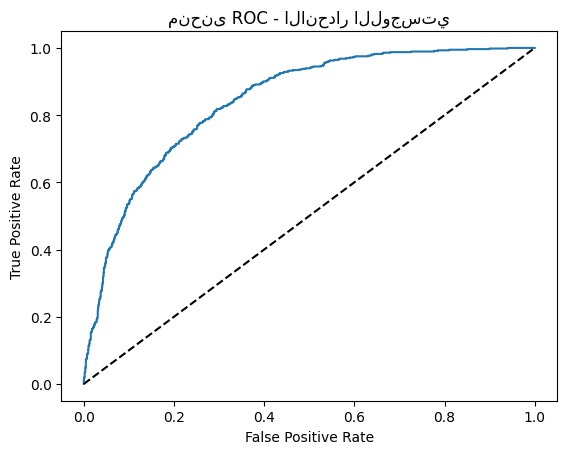

ROC-AUC: 0.8425704513295478
أفضل معلمات للغابة العشوائية: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
تقرير تصنيف الغابة العشوائية:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1552
           1       0.68      0.41      0.51       561

    accuracy                           0.79      2113
   macro avg       0.75      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



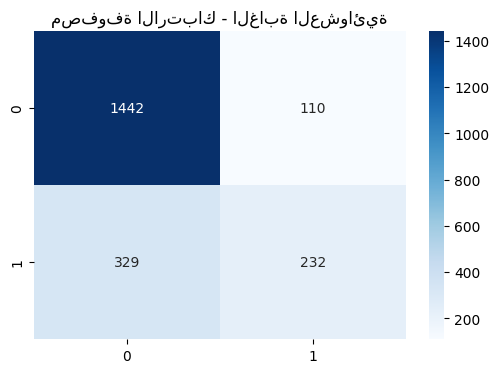

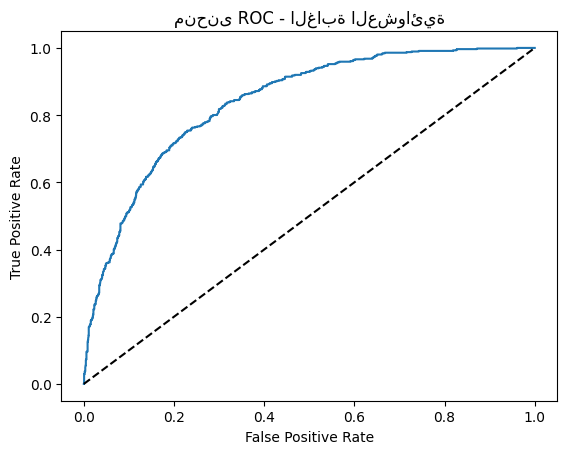

ROC-AUC: 0.839602054505026


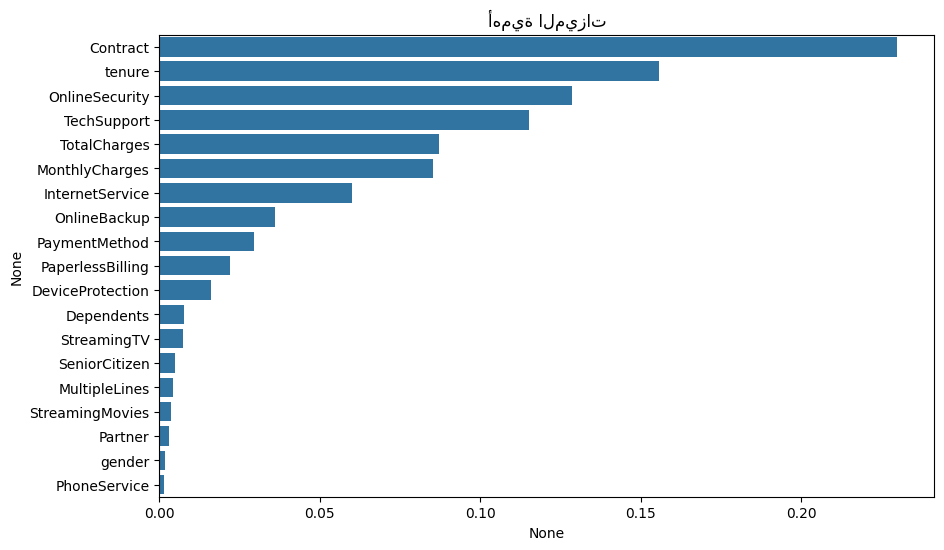

'\nبناءً على تحليلنا، نجد أن:\n\n1. أهم العوامل المؤثرة في انزياح العملاء هي:\n   - مدة اشتراك العمول (tenure)\n   - نوع العقد (Contract)\n   - قيمة الفواتير الشهرية (MonthlyCharges)\n   - خدمات إنترنت إضافية (OnlineSecurity, TechSupport)\n\n2. نموذج الغابة العشوائية حقق أداءً أفضل من الانحدار اللوجستي في التنبؤ بانزياح العملاء.\n\nالتوصيات للحد من انزياح العملاء:\n1. تقديم عروض خاصة للعملاء ذوي المدة القصيرة (tenure منخفض)\n2. تحويل العملاء من عقود شهرية إلى عقود سنوية أو biennial\n3. مراجعة تسعيرة الخدمات للعملاء ذوي الفواتير المرتفعة\n4. تحسين جودة خدمات الدعم الفني والأمان على الإنترنت\n5. إنشاء برنامج ولاء للعملاء القدامى\n'

In [ ]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('توزيع انزياح العملاء')
plt.show()

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in num_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
    plt.show()

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(x=feature, hue='Churn', data=df)
    plt.title(f'{feature} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

df_numeric = df.drop('customerID', axis=1)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('مصفوفة الارتباط')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop(['customerID'], axis=1)

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("تقرير تصنيف الانحدار اللوجستي:")
print(classification_report(y_test, y_pred_log))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('مصفوفة الارتباك - الانحدار اللوجستي')
plt.show()

y_pred_prob_log = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('منحنى ROC - الانحدار اللوجستي')
plt.show()

print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_log))

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("أفضل معلمات للغابة العشوائية:", grid_search.best_params_)
print("تقرير تصنيف الغابة العشوائية:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('مصفوفة الارتباك - الغابة العشوائية')
plt.show()

y_pred_prob_rf = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('منحنى ROC - الغابة العشوائية')
plt.show()

print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob_rf))

feature_imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('أهمية الميزات')
plt.show()

# ==============================================
#             الاستنتاجات والتوصيات
# ==============================================
"""
بناءً على تحليلنا، نجد أن:

1. أهم العوامل المؤثرة في انزياح العملاء هي:
   - مدة اشتراك العمول (tenure)
   - نوع العقد (Contract)
   - قيمة الفواتير الشهرية (MonthlyCharges)
   - خدمات إنترنت إضافية (OnlineSecurity, TechSupport)

2. نموذج الغابة العشوائية حقق أداءً أفضل من الانحدار اللوجستي في التنبؤ بانزياح العملاء.

التوصيات للحد من انزياح العملاء:
1. تقديم عروض خاصة للعملاء ذوي المدة القصيرة (tenure منخفض)
2. تحويل العملاء من عقود شهرية إلى عقود سنوية أو biennial
3. مراجعة تسعيرة الخدمات للعملاء ذوي الفواتير المرتفعة
4. تحسين جودة خدمات الدعم الفني والأمان على الإنترنت
5. إنشاء برنامج ولاء للعملاء القدامى
"""

In [22]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0
